# Prediccion de Dioxido de Carbono en Aire
## Importar Librerias Necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar el Archivo

In [2]:
air_quality = pd.read_csv('AirQualityUCI.csv', sep=";")

## Tratamiento de los Datos

In [3]:
air_quality.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
air_quality.shape

(9471, 17)

In [5]:
air_quality.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [6]:
air_quality.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [7]:
air_quality['Date'] = pd.to_datetime(air_quality['Date'])
air_quality['Month'] = air_quality['Date'].dt.month 
air_quality['Month']

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
9466     NaN
9467     NaN
9468     NaN
9469     NaN
9470     NaN
Name: Month, Length: 9471, dtype: float64

In [8]:
air_quality['Time'] = air_quality['Time'].astype(str)

horas = []

for hora in air_quality['Time']:
    horas.append(hora[:2])

air_quality['Hour'] = horas
air_quality['Hour']

0       18
1       19
2       20
3       21
4       22
        ..
9466    na
9467    na
9468    na
9469    na
9470    na
Name: Hour, Length: 9471, dtype: object

In [9]:
air_quality['CO(GT)'] = air_quality['CO(GT)'].astype(str)
air_quality['CO(GT)'] = air_quality['CO(GT)'].apply(lambda s : s.replace(',', '.'))
air_quality['CO(GT)'] = air_quality['CO(GT)'].astype(float)

air_quality['T'] = air_quality['T'].astype(str)
air_quality['T'] = air_quality['T'].apply(lambda s : s.replace(',', '.'))
air_quality['T'] = air_quality['T'].astype(float)

air_quality['RH'] = air_quality['RH'].astype(str)
air_quality['RH'] = air_quality['RH'].apply(lambda s : s.replace(',', '.'))
air_quality['RH'] = air_quality['RH'].astype(float)

air_quality['AH'] = air_quality['AH'].astype(str)
air_quality['AH'] = air_quality['AH'].apply(lambda s : s.replace(',', '.'))
air_quality['AH'] = air_quality['AH'].astype(float)

In [10]:
air_quality = air_quality[['Month', 'Hour', 'CO(GT)', 'T', 'RH', 'PT08.S1(CO)']]
air_quality.dropna(axis = 0, inplace = True)

In [11]:
air_quality['Hour'] = air_quality['Hour'].astype(float)

In [12]:
air_quality.dtypes

Month          float64
Hour           float64
CO(GT)         float64
T              float64
RH             float64
PT08.S1(CO)    float64
dtype: object

In [13]:
air_quality = air_quality[(air_quality['CO(GT)'] > 0) & (air_quality['RH'] > 0) & (air_quality['T'] > -50)]

In [14]:
air_quality.shape

(7344, 6)

## Analisis Exploratorio

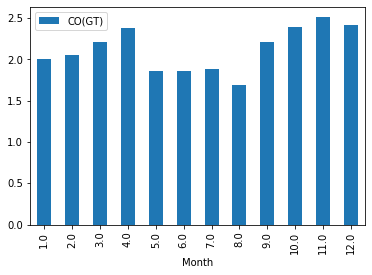

In [15]:
air_quality[['Month', 'CO(GT)']].groupby('Month').mean('CO(GT)').plot(kind='bar')

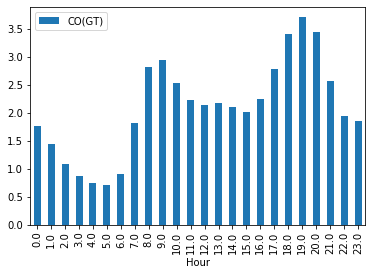

In [16]:
air_quality[['Hour', 'CO(GT)']].groupby('Hour').mean('CO(GT)').plot(kind='bar')

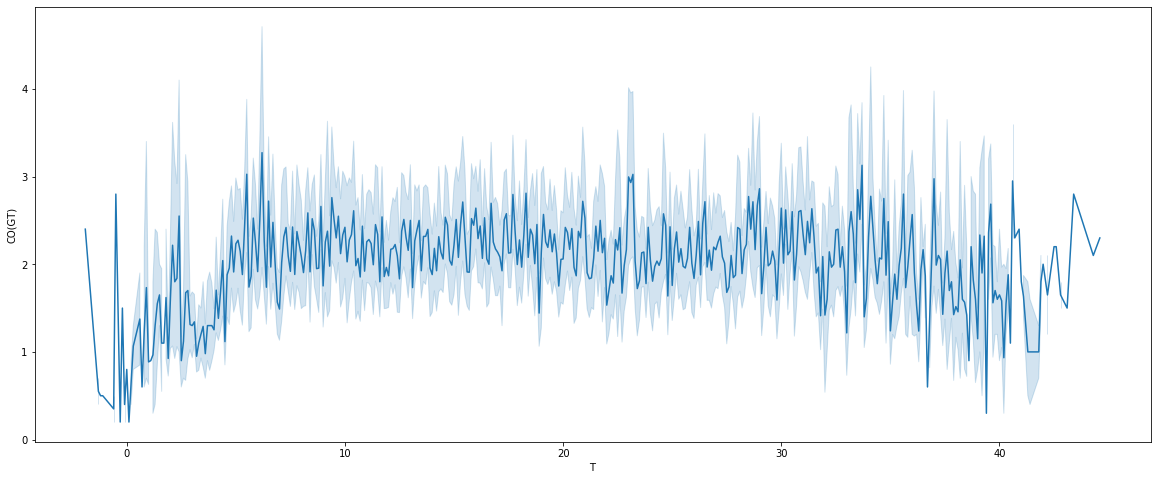

In [17]:
plt.figure(figsize = (20,8))
sns.lineplot(x='T', y='CO(GT)', data=air_quality)
plt.show()

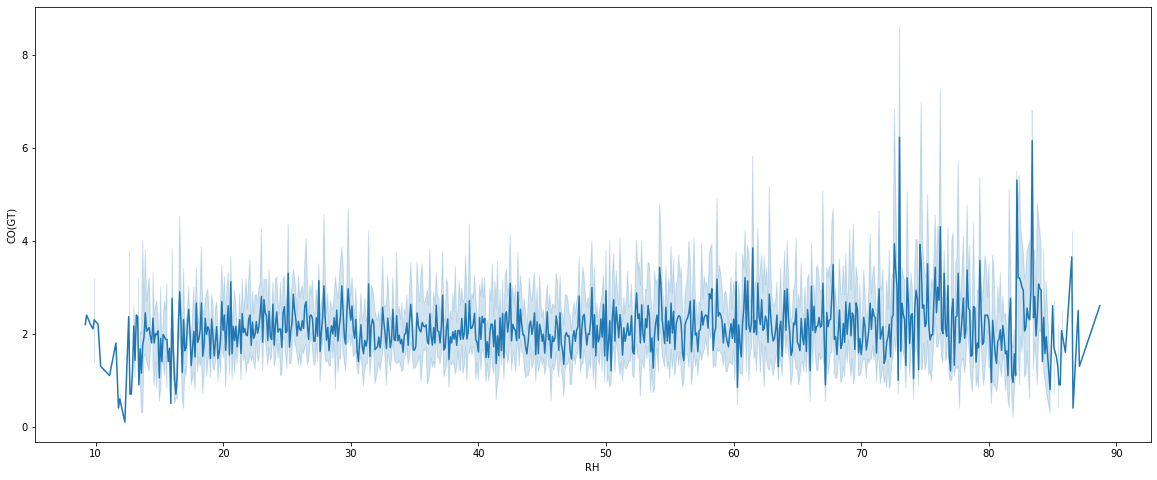

In [18]:
plt.figure(figsize = (20,8))
sns.lineplot(x='RH', y='CO(GT)', data=air_quality)
plt.show()

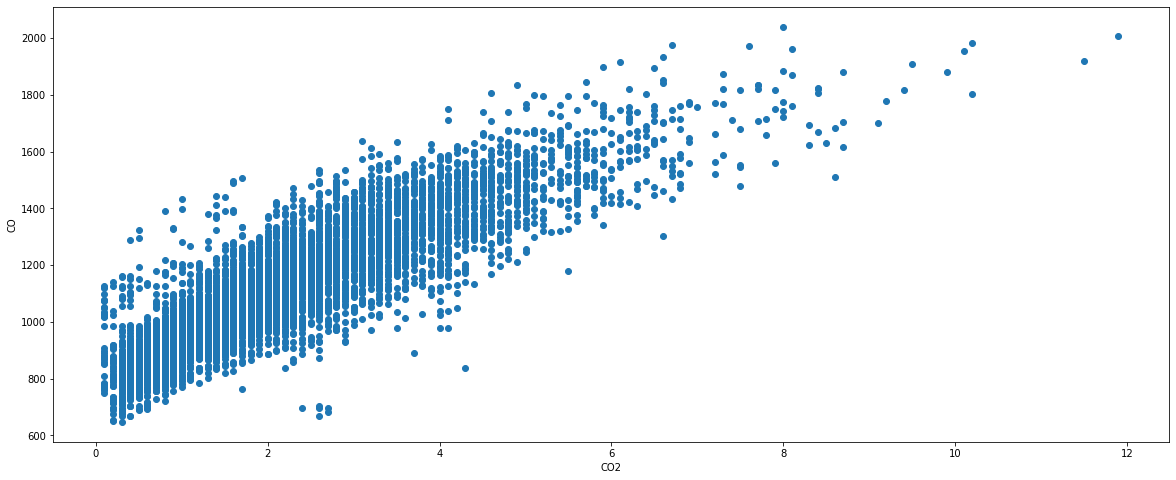

In [19]:
plt.figure(figsize = (20,8))
plt.scatter(air_quality['CO(GT)'], air_quality['PT08.S1(CO)'])
plt.xlabel('CO2')
plt.ylabel('CO')
plt.show()

## Preparacion de Datos para Entrenamiento y Prueba

In [20]:
def get_summer(n):
    if n in [5,6,7,8]:
        return 1
    else:
        return 0
    
def get_evening(h):
    if h in [2,3,4,5,6]:
        return 1
    else:
        return 0
    
def get_night(h):
    if h in [21,22,23,0,1]:
        return 1
    else:
        return 0

def get_afternoon(h):
    if h in [11,12,13,15,16]:
        return 1
    else:
        return 0

In [21]:
air_quality['Summer'] = air_quality['Month'].apply(get_summer)
air_quality['Night'] = air_quality['Hour'].apply(get_night)
air_quality['Evening'] = air_quality['Hour'].apply(get_evening)
air_quality['Afternoon'] = air_quality['Hour'].apply(get_afternoon)

In [22]:
X = air_quality[['Night', 'Evening', 'Afternoon', 'Summer', 'T', 'RH', 'PT08.S1(CO)']]
Y = air_quality['CO(GT)']
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(X, Y, test_size=0.3, random_state=64)

## Regresion Lineal

In [23]:
modelo = linear_model.LinearRegression()
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)

## Evaluacion del Modelo

In [24]:
print('Coeficientes: ', modelo.coef_)
print('Intercepccion: ', modelo.intercept_)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

Coeficientes:  [-0.22411777 -0.31259573 -0.28093061  0.07938865 -0.01352756 -0.00988079
  0.00573207]
Intercepccion:  -3.368461708160769
R2:  0.7958987339135138
MSE:  0.43493556711104236


## Gradient Boosted Tree

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
modelo = GradientBoostingRegressor(n_estimators=45, learning_rate=0.1,
max_depth=3, random_state=0, loss='ls')
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.8155995770498432
MSE:  0.3929534787763517


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=50,max_depth=3)
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.7799270722673158
MSE:  0.46897084699436875


## SVM

In [27]:
from sklearn import svm
modelo = svm.SVR()
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.794388189625966
MSE:  0.4381545056749638


## Regresión Ridge

In [28]:
modelo = linear_model.Ridge(alpha=.5)
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.795897816649361
MSE:  0.4349375217819376


## Lasso

In [29]:
linear_model.Lasso(alpha=0.1)
modelo.fit(X_entrenamiento, Y_entrenamiento)
Y_prediccion = modelo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.795897816649361
MSE:  0.4349375217819376


## Tuning al mejor Algoritmo de Regresion

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate':[0.1,0.5,1,5], 'n_estimators': [10,25,50,75,100,150,200], 'max_depth': [3,5,7]}
modelo = GradientBoostingRegressor()
grid_search = GridSearchCV(modelo, parameters)
grid_search.fit(X_entrenamiento, Y_entrenamiento)
modelo_optimo = grid_search.best_estimator_
print(modelo_optimo)
print('Score: {0}'.format(grid_search.best_score_))
print('Parametros: {0}'.format(grid_search.best_params_))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GradientBoostingRegressor(max_depth=5)
Score: 0.8281905867757313
Parametros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [31]:
Y_prediccion = modelo_optimo.predict(X_prueba)
print('R2: ', r2_score(Y_prueba, Y_prediccion))
print('MSE: ', mean_squared_error(Y_prueba, Y_prediccion))

R2:  0.8299455417076818
MSE:  0.36238252547531696


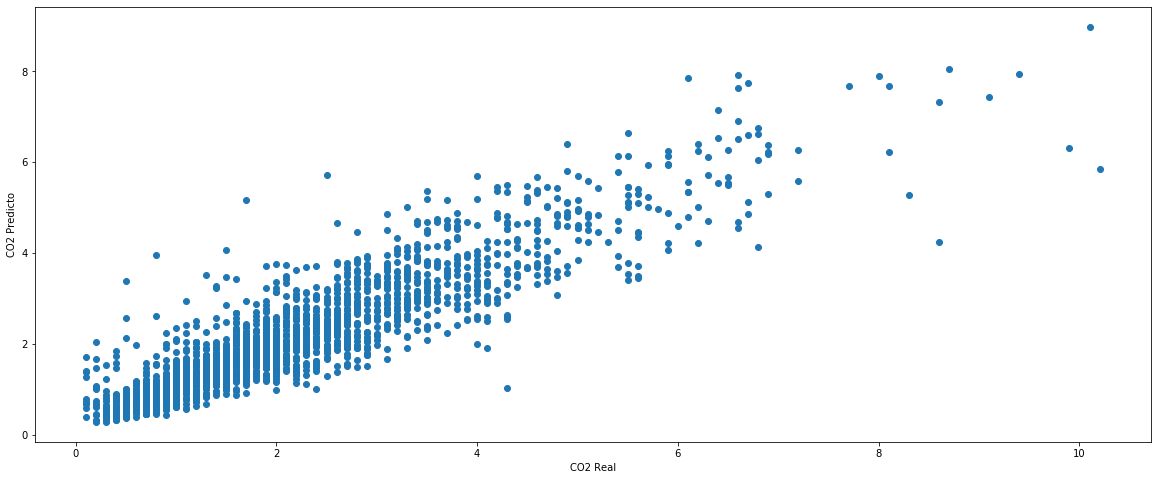

In [32]:
plt.figure(figsize = (20,8))
plt.scatter(Y_prueba, Y_prediccion)
plt.xlabel("CO2 Real")
plt.ylabel("CO2 Predicto")
plt.show()

## Guardar Modelo
Proximamente pienso utilizarlo para una app con Flask + Angular

In [33]:
import joblib
joblib.dump(modelo_optimo, 'gbt_regresor.sav')

['gbt_regresor.sav']

In [34]:
mod = joblib.load('gbt_regresor.sav')
print(mod.score(X[:500], Y[:500]))

0.8203342026883
